In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import tensorflow as tf

from tqdm import tqdm
tqdm.pandas()

C:\Users\Lee Wen Qing\AppData\Roaming\Python\Python37\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
PATH = 'train.csv'
IMG_ROOT = 'train/'

In [3]:
data = pd.read_csv(PATH)
data = data.fillna(0)

data.head(10)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,0.0,0.0,0.0,0.0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,0.0,0.0,0.0,0.0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,0.0,0.0,0.0,0.0
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0


In [4]:
# Get image as numpy array
def load_image(name, path):
    img_path = path + name + '.png'
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
    return img

# Plot numpy array
def plot_image(img):
    plt.imshow(img)
    plt.title(img.shape)
    
# Plot a grid of examples
def plot_grid(img_names, img_root, rows=5, cols=5):
    fig = plt.figure(figsize=(25,25))
    
    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        plot_image(img)
        
    plt.show()
    
    
def resize(org_size, new_size):
    return org_size/new_size
    

In [5]:
org_x = []
org_y = []

for image_x in tqdm(data['image_id']):
    org_y_val, org_x_val, _ = cv2.imread(IMG_ROOT + image_x +'.png').shape
    org_x.append(org_x_val)
    org_y.append(org_y_val)


100%|███████████████████████████████████████████████████████████████████████████| 67914/67914 [03:35<00:00, 315.82it/s]


In [6]:
data['x_dim'] = org_x
data['y_dim'] = org_y

data

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,x_dim,y_dim
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,0.0,0.0,0.0,0.0,463,512
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,0.0,0.0,0.0,0.0,479,512
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,456,512
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,410,512
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,0.0,0.0,0.0,0.0,423,512
...,...,...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,0.0,0.0,0.0,0.0,391,512
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,0.0,0.0,0.0,0.0,420,512
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,0.0,0.0,0.0,0.0,419,512
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0,494,512


In [7]:
data_meta = pd.read_csv("train_meta.csv")

data_meta

,image_id,dim0,dim1
0,4d390e07733ba06e5ff07412f09c0a92,3000,3000
1,289f69f6462af4933308c275d07060f0,3072,3072
2,68335ee73e67706aa59b8b55b54b11a4,2836,2336
3,7ecd6f67f649f26c05805c8359f9e528,2952,2744
4,2229148faa205e881cf0d932755c9e40,2880,2304
...,...,...,...
14995,b3510302f95f75a91e0fd49e04767f02,3072,3072
14996,dcb081bb5e1dac41000e96fc37c8c322,2651,2507
14997,c619a784636c085eb798f98a5ba1102d,2875,2641
14998,e7ea94b2fec95a7461b10a7f3eea2897,3072,3072


In [8]:
data = data_meta.merge(data,how='left',on= 'image_id')

data

,image_id,dim0,dim1,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,x_dim,y_dim
0,4d390e07733ba06e5ff07412f09c0a92,3000,3000,No finding,14,R1,0.0,0.0,0.0,0.0,512,512
1,4d390e07733ba06e5ff07412f09c0a92,3000,3000,No finding,14,R14,0.0,0.0,0.0,0.0,512,512
2,4d390e07733ba06e5ff07412f09c0a92,3000,3000,No finding,14,R12,0.0,0.0,0.0,0.0,512,512
3,289f69f6462af4933308c275d07060f0,3072,3072,No finding,14,R8,0.0,0.0,0.0,0.0,512,512
4,289f69f6462af4933308c275d07060f0,3072,3072,No finding,14,R9,0.0,0.0,0.0,0.0,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...
67909,e7ea94b2fec95a7461b10a7f3eea2897,3072,3072,Aortic enlargement,0,R9,1703.0,494.0,2085.0,836.0,512,512
67910,e7ea94b2fec95a7461b10a7f3eea2897,3072,3072,Cardiomegaly,3,R8,1372.0,1251.0,2452.0,1709.0,512,512
67911,56d8197180bcebfbf00bb64cc694ea8c,2430,1994,No finding,14,R5,0.0,0.0,0.0,0.0,420,512
67912,56d8197180bcebfbf00bb64cc694ea8c,2430,1994,No finding,14,R14,0.0,0.0,0.0,0.0,420,512


In [9]:
img_new_size = 512


data['x_min_scaled'] = ((data['x_dim'] / data['dim1'] * data['x_min']) * (img_new_size/data['x_dim']))
data['x_max_scaled'] = ((data['x_dim'] / data['dim1'] * data['x_max']) * (img_new_size/data['x_dim']))
data['y_min_scaled'] = ((data['y_dim'] / data['dim0'] * data['y_min']) * (img_new_size/data['y_dim']))
data['y_max_scaled'] = ((data['y_dim'] / data['dim0'] * data['y_max']) * (img_new_size/data['y_dim']))


data

,image_id,dim0,dim1,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,x_dim,y_dim,x_min_scaled,x_max_scaled,y_min_scaled,y_max_scaled
0,4d390e07733ba06e5ff07412f09c0a92,3000,3000,No finding,14,R1,0.0,0.0,0.0,0.0,512,512,0.000000,0.000000,0.000000,0.000000
1,4d390e07733ba06e5ff07412f09c0a92,3000,3000,No finding,14,R14,0.0,0.0,0.0,0.0,512,512,0.000000,0.000000,0.000000,0.000000
2,4d390e07733ba06e5ff07412f09c0a92,3000,3000,No finding,14,R12,0.0,0.0,0.0,0.0,512,512,0.000000,0.000000,0.000000,0.000000
3,289f69f6462af4933308c275d07060f0,3072,3072,No finding,14,R8,0.0,0.0,0.0,0.0,512,512,0.000000,0.000000,0.000000,0.000000
4,289f69f6462af4933308c275d07060f0,3072,3072,No finding,14,R9,0.0,0.0,0.0,0.0,512,512,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67909,e7ea94b2fec95a7461b10a7f3eea2897,3072,3072,Aortic enlargement,0,R9,1703.0,494.0,2085.0,836.0,512,512,283.833333,347.500000,82.333333,139.333333
67910,e7ea94b2fec95a7461b10a7f3eea2897,3072,3072,Cardiomegaly,3,R8,1372.0,1251.0,2452.0,1709.0,512,512,228.666667,408.666667,208.500000,284.833333
67911,56d8197180bcebfbf00bb64cc694ea8c,2430,1994,No finding,14,R5,0.0,0.0,0.0,0.0,420,512,0.000000,0.000000,0.000000,0.000000
67912,56d8197180bcebfbf00bb64cc694ea8c,2430,1994,No finding,14,R14,0.0,0.0,0.0,0.0,420,512,0.000000,0.000000,0.000000,0.000000


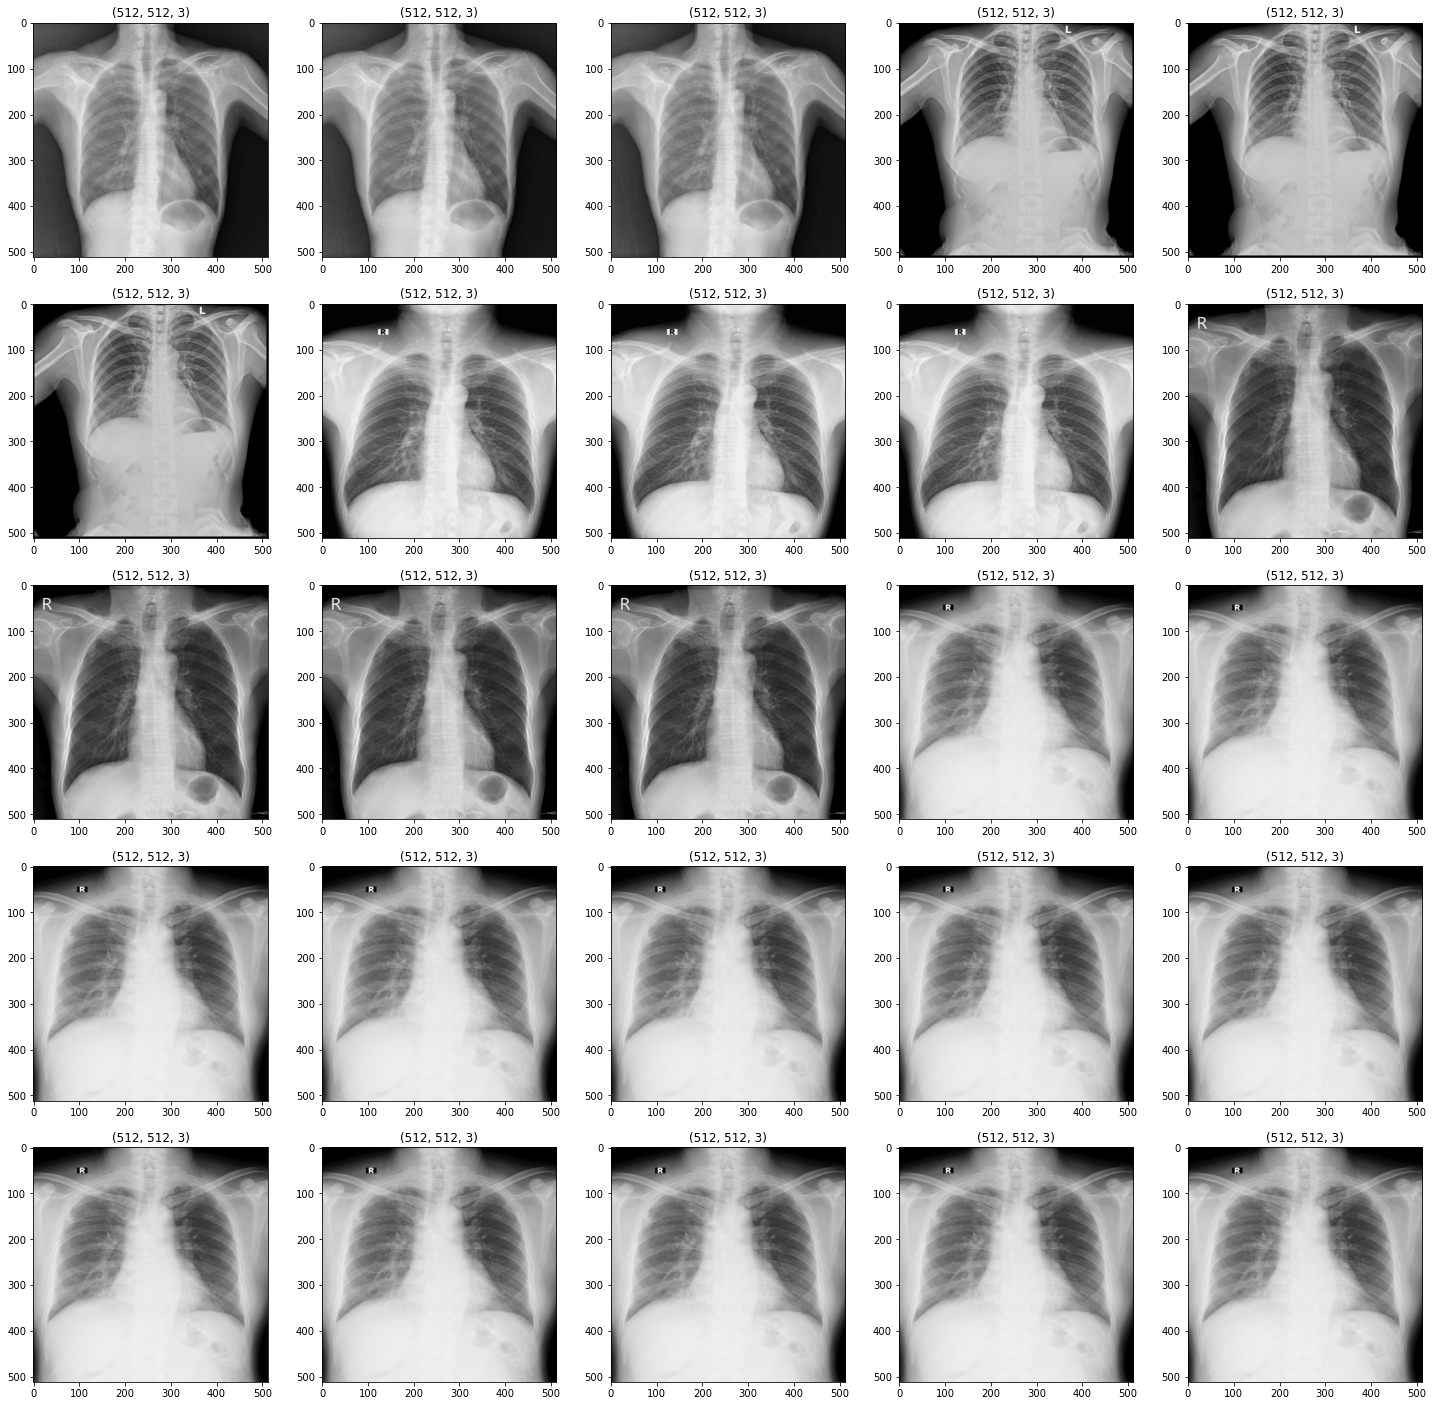

In [11]:
plot_grid(data['image_id'][:25], IMG_ROOT)

In [12]:
# filter out healthy samples
disease_data = data[data['class_id'] != 14]
# get unique filenames
filenames = list(set(disease_data['image_id'].values.tolist()))
# print a few filenames
print(filenames[:10])

['5161ae032f0552603b6de965b2bb3e09', '7610eb1f29002104c258f17b432e8d52', 'f77548b76082f9b45c05764493005039', '4b33db392748079f75a5250a15840b74', '97e5e230f793b64aba05a318d6fdf4c4', 'f58e50c4d7e818b02f28e52fd6f2a9f2', '76f366130d836a1ae9d12749d0150eb1', '7bd856b30b7129c81c6803c7f1fe23b3', '3abc9bc2967d1891119ae82511e479b3', '414615baf78e32f3405cbcf5b742895d']


In [13]:
# print the annotations from a single xray image
disease_data[disease_data['image_id'] == filenames[10]]

,image_id,dim0,dim1,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,x_dim,y_dim,x_min_scaled,x_max_scaled,y_min_scaled,y_max_scaled
36926,014e3dd712dc90f61da7ce8747d8c4c0,2880,2304,Pleural thickening,11,R9,981.0,610.0,1253.0,866.0,410,512,218.000000,278.444444,108.444444,153.955556
36927,014e3dd712dc90f61da7ce8747d8c4c0,2880,2304,Aortic enlargement,0,R10,1031.0,620.0,1242.0,818.0,410,512,229.111111,276.000000,110.222222,145.422222
36928,014e3dd712dc90f61da7ce8747d8c4c0,2880,2304,Aortic enlargement,0,R8,1034.0,605.0,1262.0,906.0,410,512,229.777778,280.444444,107.555556,161.066667


In [14]:
def class_to_color(class_id):
    colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255),(255,100,100),
              (100,255,100),(100,100,255),(255,100,0),(255,0,100),(100,0,255),(100,100,255),(100,255,0),
              (100,255,100)]
    return colors[class_id]

# draw a single bounding box onto a numpy array image
def draw_bounding_box(img, annotation):
    if annotation.isnull().values.any():
        return
    
    x_min, y_min = int(annotation['x_min_scaled']), int(annotation['y_min_scaled'])
    x_max, y_max = int(annotation['x_max_scaled']), int(annotation['y_max_scaled'])
    
    class_id = int(annotation['class_id'])
    color = class_to_color(class_id)
    
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)

# draw all annotation bounding boxes on an image
def annotate_image(img, name, all_annotations):
    annotations = all_annotations[all_annotations['image_id'] == name]
    for index, row in annotations.iterrows():
        draw_bounding_box(img, row)

In [15]:
data.loc[data['image_id'] == 'b75bba1e9dfb84fe1bd84c88c638c339']

,image_id,dim0,dim1,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,x_dim,y_dim,x_min_scaled,x_max_scaled,y_min_scaled,y_max_scaled
9872,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Aortic enlargement,0,R10,1062.0,662.0,1277.0,871.0,419,512,265.50,319.25,135.5776,178.3808
9873,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Cardiomegaly,3,R8,744.0,1407.0,1534.0,1791.0,419,512,186.00,383.50,288.1536,366.7968
9874,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Aortic enlargement,0,R9,1047.0,654.0,1272.0,886.0,419,512,261.75,318.00,133.9392,181.4528
9875,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Cardiomegaly,3,R9,706.0,1443.0,1569.0,1833.0,419,512,176.50,392.25,295.5264,375.3984
9876,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Other lesion,9,R9,763.0,939.0,1098.0,1804.0,419,512,190.75,274.50,192.3072,369.4592
9877,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Pleural thickening,11,R8,1227.0,456.0,1432.0,515.0,419,512,306.75,358.00,93.3888,105.4720
9878,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Pleural thickening,11,R8,539.0,416.0,839.0,557.0,419,512,134.75,209.75,85.1968,114.0736
9879,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Other lesion,9,R10,773.0,604.0,996.0,1536.0,419,512,193.25,249.00,123.6992,314.5728


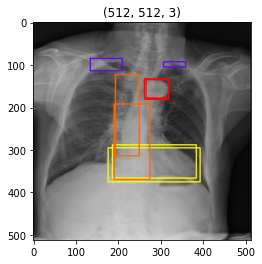

In [16]:
# Plot a single sample with all its bounding boxes
name = 'b75bba1e9dfb84fe1bd84c88c638c339'
img = load_image(name, IMG_ROOT)
annotate_image(img, name, data)
plot_image(img)

In [17]:
data.loc[data['image_id'] == 'b75bba1e9dfb84fe1bd84c88c638c339']

,image_id,dim0,dim1,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,x_dim,y_dim,x_min_scaled,x_max_scaled,y_min_scaled,y_max_scaled
9872,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Aortic enlargement,0,R10,1062.0,662.0,1277.0,871.0,419,512,265.50,319.25,135.5776,178.3808
9873,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Cardiomegaly,3,R8,744.0,1407.0,1534.0,1791.0,419,512,186.00,383.50,288.1536,366.7968
9874,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Aortic enlargement,0,R9,1047.0,654.0,1272.0,886.0,419,512,261.75,318.00,133.9392,181.4528
9875,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Cardiomegaly,3,R9,706.0,1443.0,1569.0,1833.0,419,512,176.50,392.25,295.5264,375.3984
9876,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Other lesion,9,R9,763.0,939.0,1098.0,1804.0,419,512,190.75,274.50,192.3072,369.4592
9877,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Pleural thickening,11,R8,1227.0,456.0,1432.0,515.0,419,512,306.75,358.00,93.3888,105.4720
9878,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Pleural thickening,11,R8,539.0,416.0,839.0,557.0,419,512,134.75,209.75,85.1968,114.0736
9879,b75bba1e9dfb84fe1bd84c88c638c339,2500,2048,Other lesion,9,R10,773.0,604.0,996.0,1536.0,419,512,193.25,249.00,123.6992,314.5728


In [18]:
# Plot a grid of xray images, each with all its bounding boxes
def plot_annotated_grid(img_names, img_root, all_annotations, rows=5, cols=5):
    fig = plt.figure(figsize=(16,16))
    
    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        annotate_image(img, name, all_annotations)
        plot_image(img)
        
    plt.show()

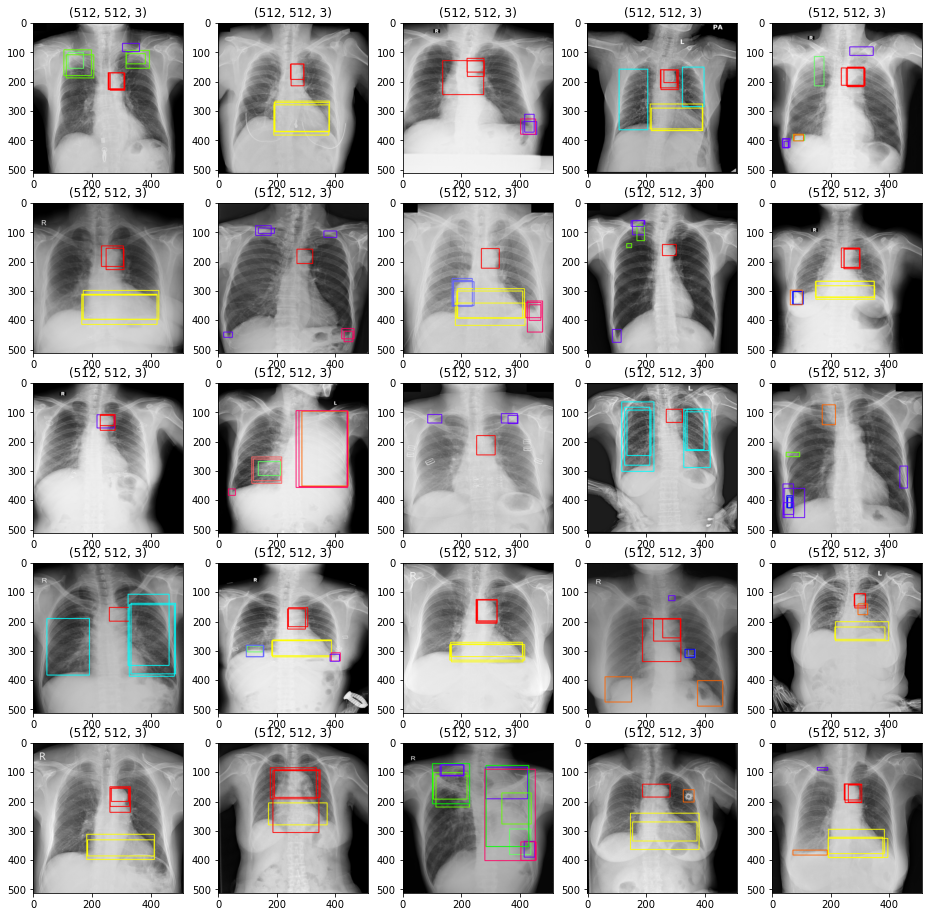

In [19]:
# filter out healthy samples
disease_data = data[data['class_id'] != 14]
filenames = list(set(disease_data['image_id'].values.tolist()))

# Plot 25 xray images with their bounding boxes
plot_annotated_grid(filenames[:25], IMG_ROOT, data, rows=5, cols=5)

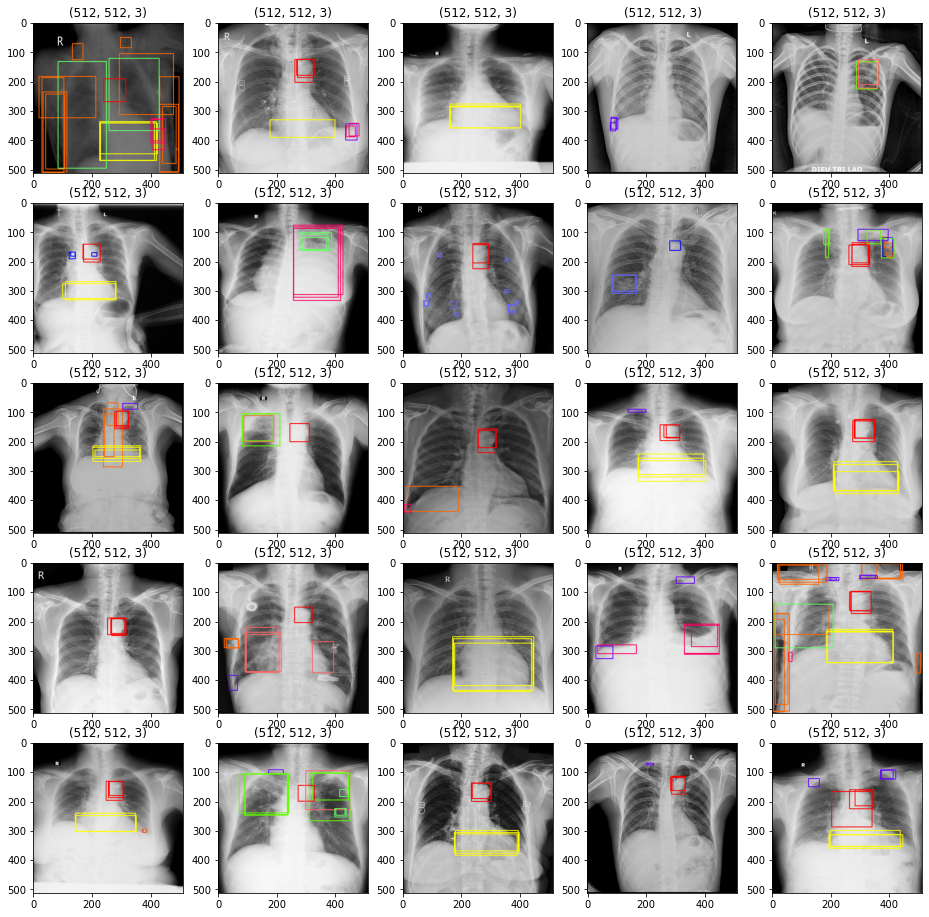

In [20]:
# filter out healthy samples
disease_data = data[data['class_id'] != 14]
filenames = list(set(disease_data['image_id'].values.tolist()))

# Plot 25 xray images with their bounding boxes
plot_annotated_grid(filenames[25:50], IMG_ROOT, data, rows=5, cols=5)

In [22]:
data.to_csv('train_scaled_rev.01.csv', index=False)